# perform an A/B Test for ad campaign using python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Task one : Load the dataset

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
#load the dataset
df = pd.read_excel('AB test.xlsx')

In [4]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [5]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 29.4+ KB


# Task Two : Set up the hypothesis testing steps


In [6]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [7]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

### experiment group : 
the group that is involved in the new experiment . i.e the group that received the new ad . 
### Control group : 
the 2nd group that didn't receive the new ad
### Click-through rate (CTR) : 
the number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null Hypothesis.
<br>
2) Specify the Alternative Hypothesis.
<br>
3) Set the Significance Level (a)
<br>
4) Calculate the  Corresponding P-Value.
<br>
5) Drawing a Conclusion



## Task Three : Compute the difference in the click-through rate 

In [9]:
# Get dataframe with all observations from control group 
control_df = df[df['group'] == 'control']

# Compute CTR for control group 
ctr_control = len(control_df[control_df['action'] == 'view and click'])/len(control_df)

#Display the CTR For the control group
ctr_control

0.19349680170575692

In [11]:
# Get dataframe with all records from experiment group 
exp_df = df[df['group'] == 'experiment']

# Compute click through rate for experiment group 
ctr_experiment = len(exp_df[exp_df['action'] == 'view and click'])/len(exp_df)

#Display the CTR For the experiment group
ctr_experiment

0.16586921850079744

In [12]:
#Compute the difference in the CTR 
diff_ctr = ctr_experiment - ctr_control

#display the difference 
diff_ctr

-0.027627583204959477

# Task four : create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [17]:
#bootsrapping
sample_differences = []
size = df.shape[0] # getting all the rows

for i in range(10000):
    sample = df.sample(size, replace=True)
    control_df = sample[sample['group'] == 'control']
    exp_df = sample[sample['group'] == 'experiment']
    ctr_control = len(control_df[control_df['action'] == 'view and click'])/len(control_df)
    ctr_experiment = len(exp_df[exp_df['action'] == 'view and click'])/len(exp_df)
    
    sample_differences.append(ctr_experiment - ctr_control)
    
    
    
sample_differences[:4]

[-0.0016674431442695314,
 -0.03757815910160259,
 -0.008016572722455095,
 -0.015590922487474235]

# Task five : Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([   7.,   89.,  445., 1489., 2588., 2948., 1715.,  598.,  110.,
          11.]),
 array([-0.07675751, -0.06710414, -0.05745077, -0.04779739, -0.03814402,
        -0.02849064, -0.01883727, -0.00918389,  0.00046948,  0.01012285,
         0.01977623]),
 <BarContainer object of 10 artists>)

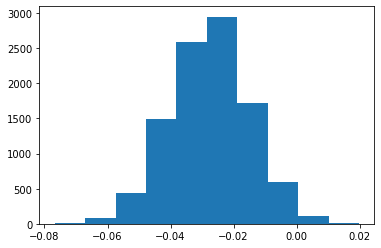

In [19]:
# Plot the sampling distribution 
plt.hist(sample_differences)

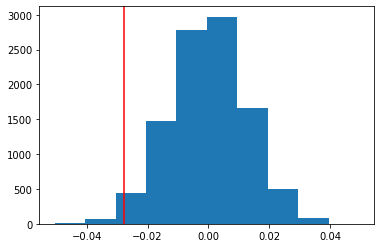

In [25]:
#simulate the distribution under the null hypothesis 
import statistics as s
sample_differnces = np.array(sample_differences)
std_diff = s.stdev(sample_differences)
null_hypothesis = np.random.normal(0, std_diff, len(sample_differences))

#plot the null distribution 
plt.hist(null_hypothesis)
plt.axvline(diff_ctr, c='red')


###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [27]:
# Compute the  P-value 
# the probability that the average null hypothesis is greater than or equal to the ctr of the sample observed 

(null_hypothesis > diff_ctr).mean()

0.9855

## Since the p-value is so high, and not less than 0.05 we fail to reject the null hypothesis and say that the new ad campaign does not generate better CTR than the old one.  